# **Universidad Central**

![UC](https://www.ucentral.edu.co/themes/ucentral/img/template/Universidad%20Central.png)

# **Maestría en Analítica de Datos**
## *Fundamentos De Estadística Para La Analítica de Datos*
## **Profesor**: Nelson Alirio Cruz Gutierrez Ph.D.
## **Estudiantes**:
## -- Cristian Camilo Guevara Serrano
## -- Jennifer Alexandra Rodríguez Crespo 
## -- Stiven Leonardo Silva Castillo


## Tarea Regresión Lógistica

1. Sea $Y=class$ la variable que indica si una persona tiene o no diabetes.

2. Realizar la tabla cruzada entre Polyuria y class, ¿hay alguna relación?

3. Realizar la tabla cruzada entre Gender y class, ¿hay alguna relación?



In [249]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [250]:
datos = pd.read_csv("https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Diabetes.csv", sep=";")
datos.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### 1. Sea $Y=class$ la variable que indica si una persona tiene o no diabetes.

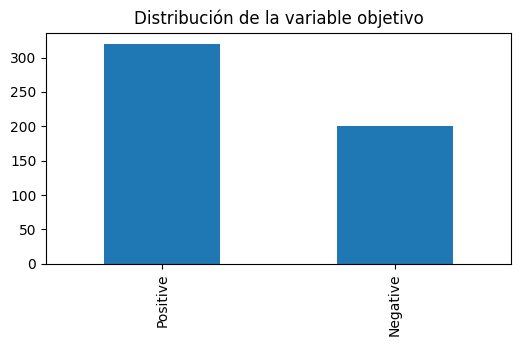

In [251]:
plt.subplots(figsize = (6,3))
datos['class'].value_counts().plot(kind = 'bar')
plt.title("Distribución de la variable objetivo")
plt.show()

### 2. Realizar la tabla cruzada entre Polyuria y class

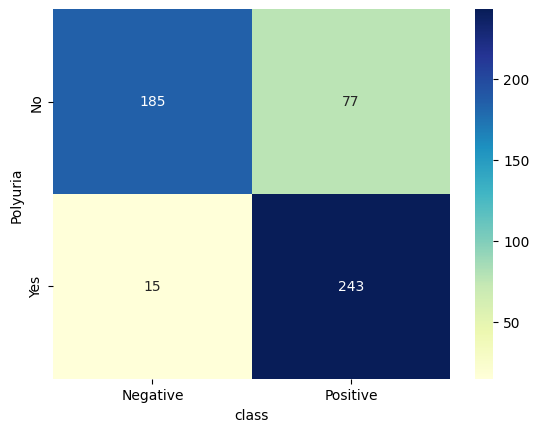

In [252]:
tablaPoly = pd.crosstab(datos['Polyuria'],datos['class'])
sns.heatmap(tablaPoly, cmap="YlGnBu",annot = True,fmt=".0f")
plt.show()

Se evidencia que en los casos donde se presenta Polyuria existe una cantidad considerable de casos positivos de diabetes (243 registros) con respecto a los casos donde no se tiene dicha condición y se tiene diabetes (15 registros).

Si se revisa la proporción de casos en que la persona tiene o no tiene Polyuria y tiene diabetes:
* Si la persona tiene Polyuria hay un 94% de casos que tiene diabetes
* Si la persona no tiene Polyuria hay un 70% de casos que tiene diabetes

### Realizar la tabla cruzada entre Gender y class

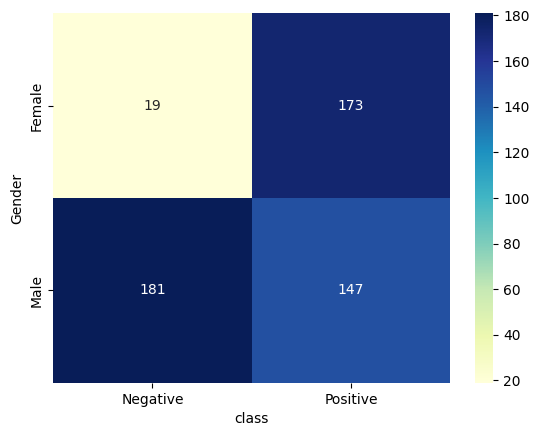

In [253]:
tablaGender = pd.crosstab(datos['Gender'],datos['class'])
sns.heatmap(tablaGender, cmap="YlGnBu",annot = True,fmt=".0f")
plt.show()

Se evidencia que hay un mayor número de mujeres con diabetes (173 registros) en relación a los hombres (147 registros).

Revisando la proporción de casos que tienen diabetes, de la muestra que se tiene por género, se tiene que un 44.8% de los hombres tienen diabetes y de las mujeres un 90%.

## Logistica

1. Sea $p$ la probabilidad de tener diabetes, $p$ es un valor entre 0 y 1

3. Graficar la función $f(p)=\frac{p}{1-p}$

4. Graficar la función $f(p)=ln\left(\frac{p}{1-p}\right)$


In [254]:
from sklearn.linear_model import LogisticRegression # Libreria 
from sklearn.model_selection import train_test_split # Para dividir la base en train y test 

In [255]:
data_entrenamiento = pd.get_dummies(datos, drop_first=True)

In [256]:
data_entrenamiento

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [257]:
X = data_entrenamiento.iloc[:,:-1]
Y = data_entrenamiento.iloc[:,-1]

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=20) ## Muestreo aleatorio simple
X_test.shape

(104, 16)

In [259]:
lr = LogisticRegression()

In [260]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [261]:
prob = list(map(lambda x: x[1],lr.predict_proba(X_test)))

In [262]:
f_p = list(map(lambda p: p/(1-p),prob))

### 3.2 Graficar la función $f(p)=\frac{p}{1-p}$

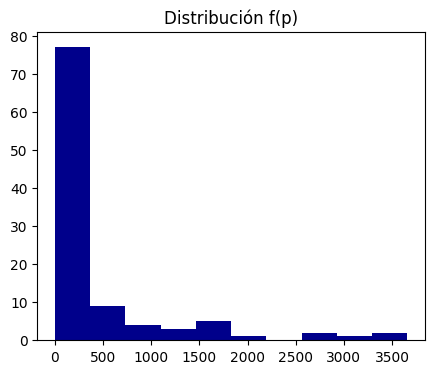

In [287]:
plt.subplots(figsize = (5,4))
plt.hist(f_p, color = "#00008B")
plt.title("Distribución f(p)")
plt.show()

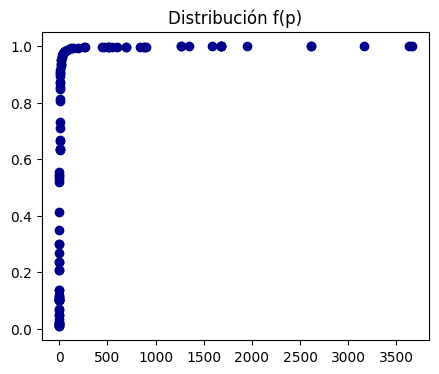

In [288]:
plt.subplots(figsize = (5,4))
plt.scatter(f_p, prob, color = "#00008B")
plt.title("Distribución f(p)")
plt.show()

### 3.3 Graficar la función $f(p)=ln\left(\frac{p}{1-p}\right)$

In [266]:
f_p_log = np.log(f_p)

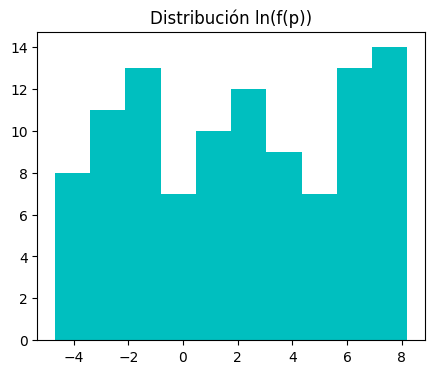

In [286]:
plt.subplots(figsize = (5,4))
plt.hist(f_p_log, color = "#00BFBF")
plt.title("Distribución ln(f(p))")
plt.show()

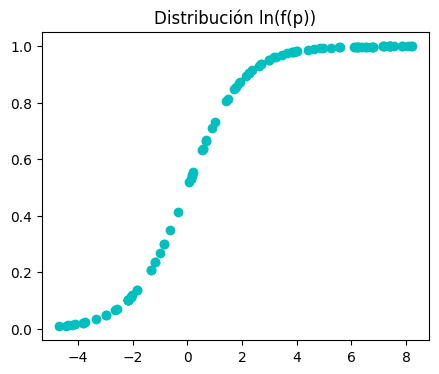

In [285]:
plt.subplots(figsize = (5,4))
plt.scatter(f_p_log, prob, color = "#00BFBF")
plt.title("Distribución ln(f(p))")
plt.show()